In [58]:
import numpy as np
from astropy.io import fits
import lime 
import matplotlib.pyplot as plt

In [59]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [60]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file = "../../../reduccion/NGC1313/cal/slit1_1D001.fits"

#load the data
wave, flux, hdr = import_1313_fits(fits_file)

In [61]:
# Galaxy redshift and the flux normalization
z_obj = 0.00158
normFlux = 1

In [62]:
gp_spec = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=normFlux)


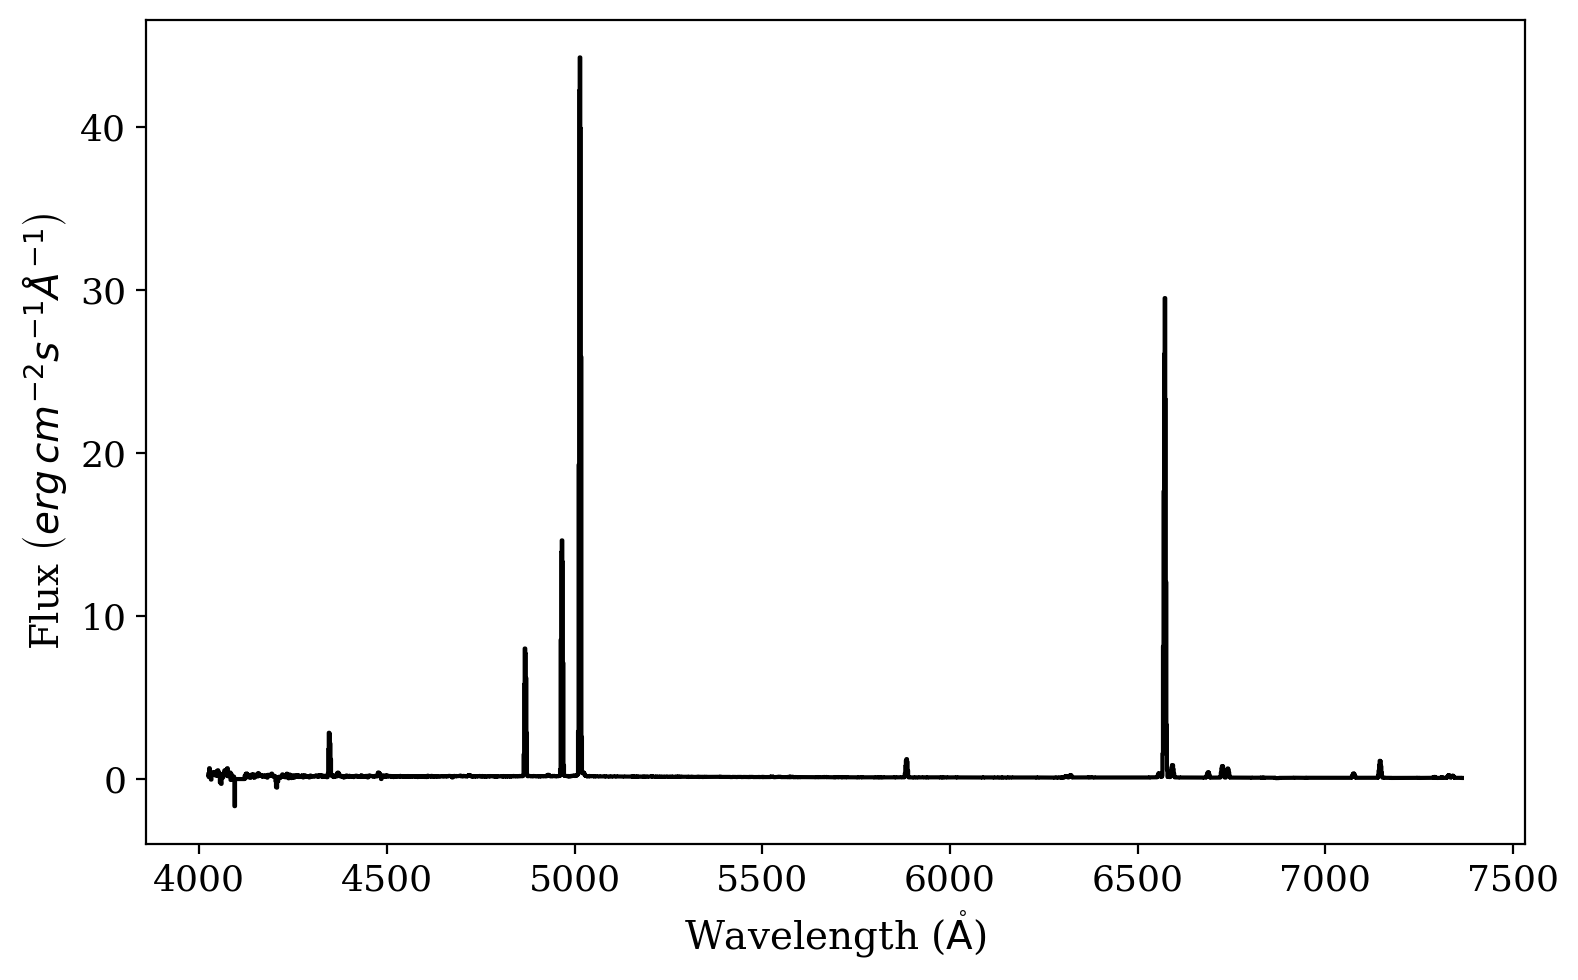

In [63]:
gp_spec.plot.spectrum(label='NGC1313')

In [64]:
gp_spec.fit.bands(6563)

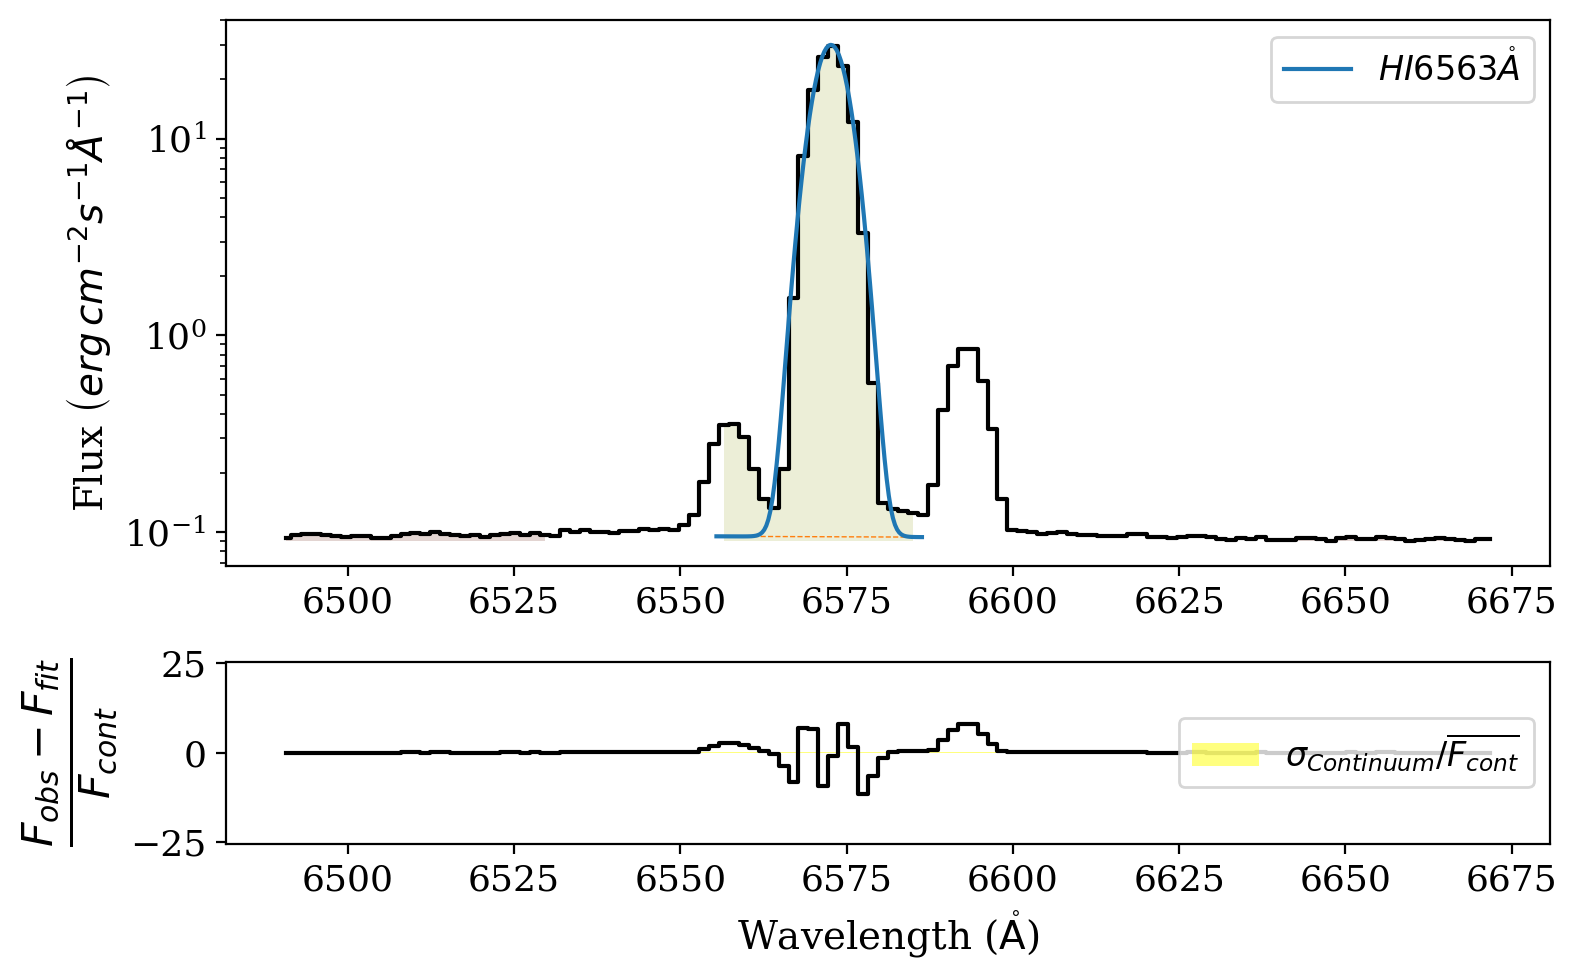

In [65]:
gp_spec.plot.bands()

In [66]:
# Line name and its location mask in the rest _frame
line = 'H1_6563A'
#band_edges = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
band_edges = np.array([6430.03, 6490.66, 6535.10, 6600.95, 6627.70, 6661.82])

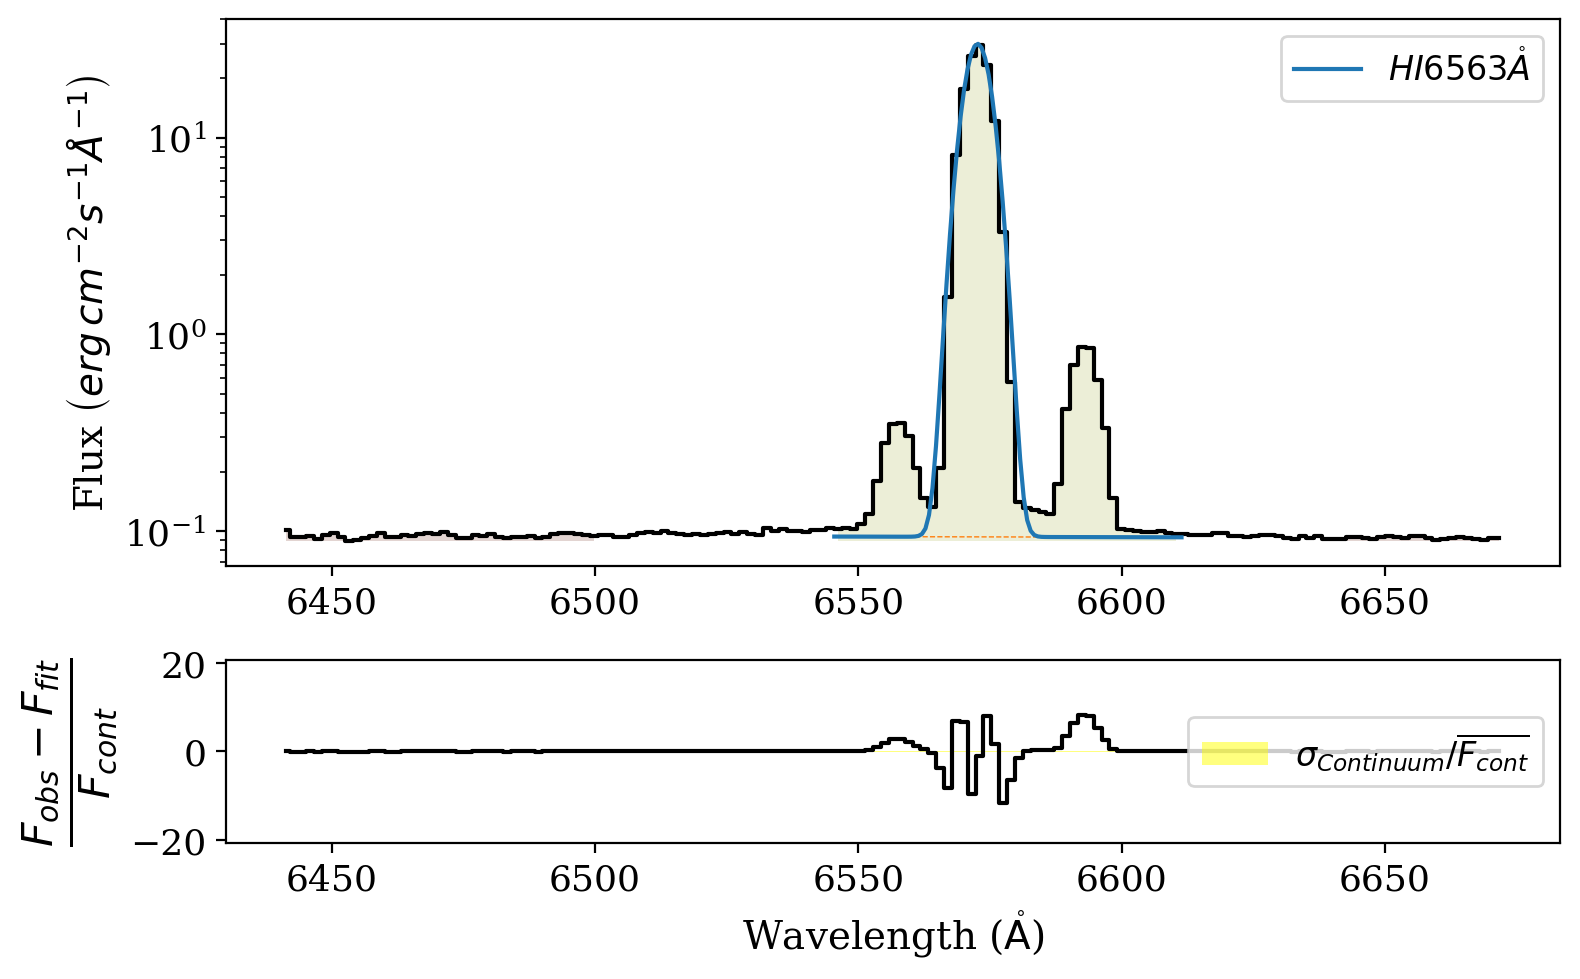

In [67]:
# Run the fitting and plot it
%matplotlib inline
gp_spec.fit.bands(line, band_edges)
gp_spec.plot.bands()

ext region y ext glx   

a) corregir x ext nuestra glx asumiendo eb-v (exceso de color)  
b) primero nuestra glx, fitz o card, luego 
ley de extincion 
y posterior mido h alfa y h beta, ratios, calzetti 2000 starburst
obj: tener solo ext de nuestra region !!


al final de todas las correciones por exticioon (galáctica y de la region), mido el flujo de todas las lineas, y la velocidad radial de la región, 



In [68]:
# Fit configuration
line = 'H1_6563A_b'
fit_conf = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

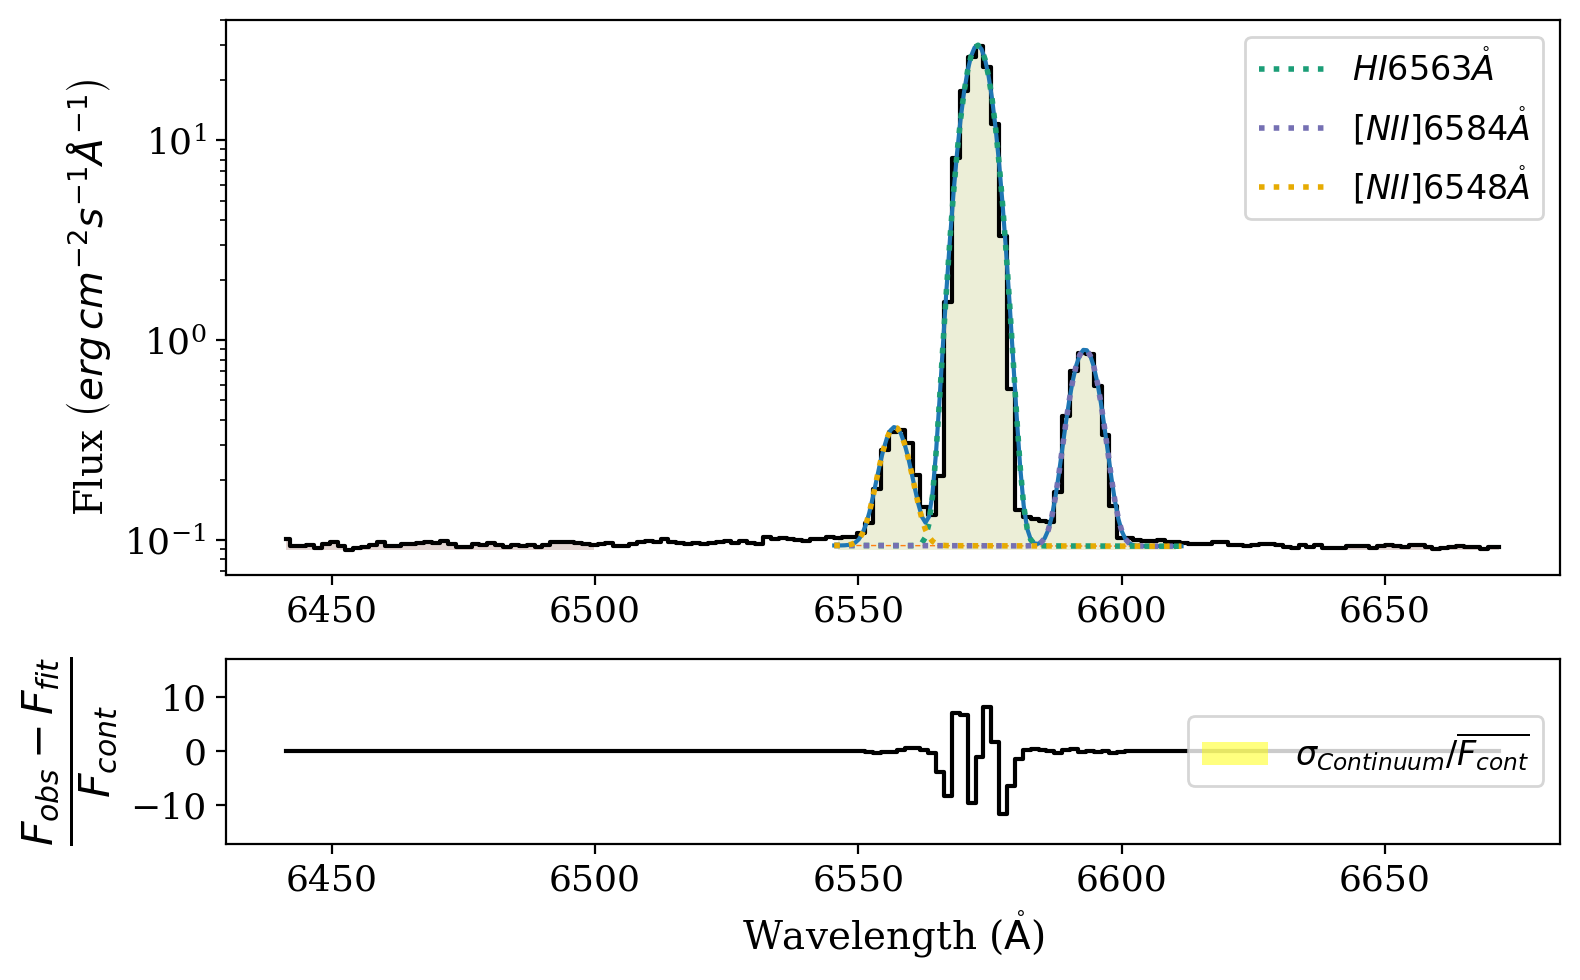

In [69]:
# New attempt including the fit configuration
gp_spec.fit.bands(line, band_edges, fit_conf=fit_conf)
gp_spec.plot.bands()